In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 18.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [3]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import os
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

In [4]:
reader = easyocr.Reader(['ko'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [9]:
img_path = os.path.join(os.getcwd(), "Uhan_4_table_13.jpg")
img = cv2.imread(img_path)
resize_img = cv2.resize(img, (64, 64))
Image(resize_img)

In [12]:
output = reader.readtext(resize_img)

In [19]:
output

[([[4, 10], [62, 10], [62, 34], [4, 34]], '인반', 0.5186736481953887),
 ([[17, 33], [49, 33], [49, 53], [17, 53]], '고', 0.9953225838632171)]

In [14]:
# cord = output[-1][0]

In [32]:
for i,info in enumerate(output):
  coord = info[0]
  x_min, y_min, x_max, y_max = coord[0][0], coord[0][1], coord[1][0], coord[2][1]
  # x_min, y_min = [int(min(idx)) for idx in zip(coord[0])]
  # x_max, y_max = [int(max(idx)) for idx in zip(coord[0])]
  cv2.rectangle(resize_img,(x_min,y_min),(x_max,y_max),(0,0,255),2)

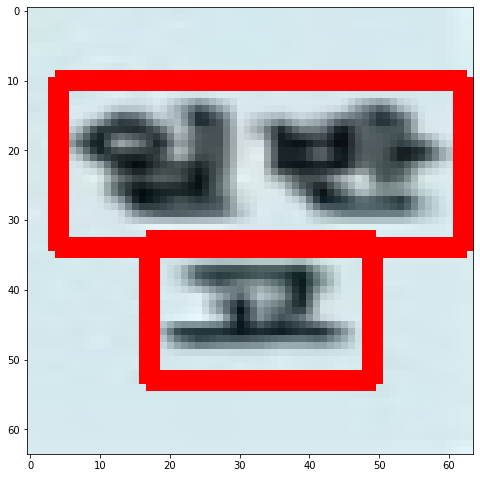

In [33]:
# image = cv2.imread(img)
# cv2.rectangle(resize_img,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))